#  Notebook de la Práctica 3 de FAA

# Apartado 1

A continuación, vamos a hacer una descripción de los detalles de la implementación de la práctica.

### a) Generación de la población inicial con especial indicación del número de reglas por individuo consideradas

Para la creación de la población inicial lo primero que realizamos es calcular la k, que nos será útil en el futuro con la fórmula "k = int(1+3.322*log10(N))" siendo N el número de individuos.
El segundo paso es crear tantos individuos como el número de individuos introducido al crear el clasificador, cada individuo será una lista de reglas, por lo que al crear el individuo creamos de 1 a 5 reglas de forma aleatoria y las introducimos en el individuo.
Para la creación de estas reglas creamos de forma aleatoria tantos "bits" como atributos tenga, si es en representación binaria, estos números aleatorios serán '0' o '1' y en el caso de enteros serán de '0' a '9', al final de cada regla introducimos la clase que también se introduce de forma aleatoria '1' o '0'.
Una vez tenemos todos los individuos con sus reglas creadas, calculamos el fitness de cada individuo y lo introducimos en la población.
Por último, tras la creación de la población inicial continuamos con el algoritmo genético, es decir, cruzar, mutar y la selección de los mejores de la generación para seguir tantas generaciones o épocas como se le haya introducido.

Cabe resaltar como pide en el apartado que hemos considerado de 1 a 5 reglas por individuo, elgiendose de forma aleatoria el número entre 1 y 5. Esto se ha realizado para que no haya individuos iguales.

#### Código de procesamiento, método en el que se ejecuta el algoritmo. Se muestra hasta la creación de la población inicial

In [4]:
def procesamiento(self, dataset, clasificador, binary):
    poblacion=[]
    auxP = []
    tam = len(dataset.nombreAtributos)

    #calculamos el numero de intervalor (caso entero)
    n = self.poblacion	# El numero de individuos es el que le has introducido
    k = int(1+3.322*np.log10(n))
    
    for i in range(n):
      individuo=[]
      r = random.randint(1, 5)	# Numero de reglas del individuo que se crea, minimo 1, maximo 5
      for j in range(r):	# Creamos j reglas y las vamos introduciendo una a una en individuo
        individuo.append(self.crearRegla(tam-1,k, binary))
      auxP.append(individuo)
      # En este punto ya tenemos la poblacion inicial creada
    poblacion = self.fitnessPob1(auxP,dataset,clasificador, binary, k)


#### Código del método crearRegla, que crea las reglas de cada individuo

In [ ]:
# Metodo que crea reglas de tamano tam, si la representacion es binaria b valdra true
  # y k no sera relevante. Si la representacion es entera b valdra false y se usara k
  # para la generacion de la regla 
  def crearRegla(self,tam, k, b):
    # Para representacion entera
    # generamos aleatorios entre 1 y K para los n "bits" (tam) de la regla
    if(not b):	 # si la representacion es entera
        auxL=[]
        for i in range(tam):
            auxL = np.append(auxL, random.randint(0,k))		#Se introduce un intervalo de 1 a k intervalos
        if random.random()<0.5: # de forma aleatoria generamos 0 o 1 para la clase
            auxL= np.append(auxL,1)
        else:
            auxL= np.append(auxL,0)   		

    #generamos aleatorios 0 y 1 para los n "bits" (tam) de la regla
    else:		# Si la representacion es binaria
        auxL=[]
        for i in range(tam):
            r=[]
            for j in range(k):
                if random.random()<0.5:		# de forma aleatoria generamos 0 o 1 y lo introducimos a la regla
                    r= np.append(r,1)
                else:
                    r= np.append(r,0)
            auxL.append(r)
        if random.random()<0.5:     # Introducimos la clase
            auxL.append(1)
        else:
            auxL.append(0)

    return auxL

### b) Mecanismo de cruce implementado

El cruce lo hemos realizado en un punto sobre dos individuos para la creación de dos hijos.
Para la realización de este cruce introducimos en una nueva lista que va a ser la de la nueva población los progenitores, después, generamos dos números aleatorios dentro del rango 0 y número de reglas de los individuos que se están cruzando. Esos dos números aleatorios van a ser los puntos donde se crucen los dos individuos.
Una vez hecho el cruce los hijos se introducen en la lista con los individuos de la nueva población. Posteriormente se calcularán los nuevos fitnes de estos individuos.
Cabe destacar que siempre se cruza y no hemos utilizado una probabilidad de cruce.

#### Método que realiza el cruce de dos individuos

In [ ]:
  def cruceUniformePob(self, pob):
    p = []
    for l in range(int(len(pob)/2)):
      p.append(pob[l*2][1])
      p.append(pob[l*2+1][1])
      ptoCruce1 = random.randint(0, len(pob[l*2][1])-1) #elijes el punto de cruce del primer individuo
      ptoCruce2 = random.randint(0, len(pob[(l*2)+1][1])-1) # elije el punto de cruce del segundo individuo

      hijo1 = []
      hijo2 = []
      # cruce en cualquier punto de los dos individuos
      hijo1[:ptoCruce1] = pob[l*2][1][:ptoCruce1]
      hijo1[ptoCruce1:] =pob[(l*2+1)][1][ptoCruce2:]
      hijo2[:ptoCruce2] = pob[(l*2+1)][1][:ptoCruce2]
      hijo2[ptoCruce2:] = pob[l*2][1][ptoCruce1:]

      p.append(hijo1)
      p.append(hijo2)
    return p

### c) Mecanismo de mutación implementado

Para realizar la mutación hemos usado mutación por bitflip. Le pasamos a la pasamos a función la población y recorre individuo a individuo, regla a regla generamos un número aleatorio entre 0 y 1 y si sale menor de 0.001 realiza la mutación. En el caso de ser para representación entera se genera un número entero para ese "bit" entre el 0 y el 9 pudiendo salir el mismo número por el que se muta.
En el caso de representación binaria simplemente se cambia el valor, es decir si es 0 se cambia a 1 y viceversa.

#### Método que realiza el cruce de todos los individuos de la población

In [ ]:
  def mutacionPob(self, pob, b,k):
    for p in range(len(pob)):  
      for l in range(int(len(pob[p]))):
        for i in range(len(pob[p][l])):#cambiar
          if(not b):
            if random.random() < 0.001:
              pob[p][l][i] = random.randint(0,k)
          else:
            for j in len(pob[p][l][i]):
              if random.random() < 0.001:
                pob[p][l][i][j] = 0 if pob[p][l][i][j]==1 else 1
      return pob

# Apartado  2

A continuación se va a ejecutar el algoritmo para los casos indicados en los apartados. Se usarán tanto la representación entera como la binaria.

Cabe destacar que la partición inicial de datos que se ha usado es usando la estrategia de validación cruzada que a nuestro parecer es la que obtiene resultados más coherentes con una única partición.
Hemos usado en vez de wdbc.data, wdbc-10.data que es el mismo fichero pero con menos columnas tal y como nos ha indicado el profesor que hagamos para simplificar el tiempo de simulación.

## a) Tamaño de la población: 100; Generaciones: 100

### Representación entera

In [2]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(100, 100)
a =cla.procesamiento(dataset, clasificador, False)
print("Probabilidad de error ",a)

Probabilidad de error  0.6274165202108963


### Representación binaria

In [3]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(100, 100)
a =cla.procesamiento(dataset, clasificador, True)
print("Probabilidad de error ",a)

Probabilidad de error  0.37258347978910367


## b) Tamaño de la población: 100; Generaciones: 200

### Representación entera

In [4]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(200, 100)
a =cla.procesamiento(dataset, clasificador, False)
print("Probabilidad de error:",a)

Probabilidad de error: 0.6274165202108963


### Representación binaria

In [5]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(200, 100)
a =cla.procesamiento(dataset, clasificador, True)
print("Probabilidad de error ",a)

Probabilidad de error  0.37258347978910367


## c) Tamaño de la población: 200; Generaciones: 100

### Representación entera

In [6]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(100, 200)
a =cla.procesamiento(dataset, clasificador, False)
print("Probabilidad de error:",a)

Probabilidad de error: 0.6274165202108963


### Representación binaria

In [7]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(100, 200)
a =cla.procesamiento(dataset, clasificador, True)
print("Probabilidad de error:",a)

Probabilidad de error: 0.37258347978910367


## d) Tamaño de la población: 200; Generaciones: 200

### Representación entera

In [8]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(200, 200)
a =cla.procesamiento(dataset, clasificador, False)
print("Probabilidad de error:",a)

Probabilidad de error: 0.6274165202108963


### Representación binaria

In [9]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG 

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(200, 200)
a =cla.procesamiento(dataset, clasificador, True)
print("Probabilidad de error:",a)

Probabilidad de error: 0.37258347978910367


# Apartado 3

En este apartado se va a realizar el análisis de resultados del apartado anterior, teniendo en cuenta el número de reglas, el tamaño de la población, número de generaciones, tasas de cruce y mutación. Y la importacia de ambas representaciones.

Los resultados de la representación entera como media de error nos da 0.627, este valor es alto, ya que debería estar rondando entre el 0.3 y 0.4 de error. Aunque es un resultado malo para un algoritmo genético, hemos reflexionado que esto puede ser debido a que no mantenemos elitismo y por lo tanto en cualquier mutación o cruce de tener un individuo muy bueno podemos descartarlo. También, es posible que el algoritmo se pueda afinar mejor, debido a nuestra poca experiencia implementando algoritmos genéticos. También hay que resaltar que la representación entera es menos flexible que la representación binaria, ya que un atributo solo puede estar en un intervalo y esto hace que en general el resultado comparado con la representación binaria sea peor.

En el caso de los resultados de la representación binaria, estos son bastante buenos, nos da 0.37 de probabilidad lo cual es bueno y está entre el 0.3 y 0.4 que era lo que se esperaba. Aunque, la representación binaria es más costosa porque cada atributo de cada intervalo tiene cadenas de números binarios que hace que la complejidad sea mayor, obtiene mejores resultados frente a la representación entera ya que es más flexible porque un número puede pertenecer a varios intervalos.

El tamaño y el número de reglas son importantes, ya que cuanto mayor son las reglas y cuantas más hay mas complejidad tiene el algoritmo y más información tiene el individiuo. El la práctica hemos implementado que cada individuo tenga de 1 a 5 reglas para que sea una distribución más heterogénea y haya más diferencia entre los individuos.

El tamaño de la población y el número de generaciones también afectan a la complejidad del algoritmo, ya que cuanto mayor sean más costoso es, pero en cambio, mayor efectividad tiene hasta el punto en el que converja, quizás en nuestros ejemplos no se nota, esto puede ser debido a muchos factores, pero lo importante es que el aumento de generaciones y el aumento de tamaño de la población hace que haya más probabilidades de que se formen individuos que cumplan las reglas cada vez mejor, y por lo tanto, tenga mejor resultado. En nuestro caso, además se puede comprobar que puede no seguir lo que acabamos de explicar porque no tenemos elitismo, es decir, aunque nos quedamos siempre con los mejores de cada generación, no los protegemos de cruces y mutaciones que pueden no ser beneficiosos para la población y por lo tanto, si por ejemplo se muta un bit ( o varios) de un individuo con un fitness muy bueno, esto puede cambiar radicalmente. ESte comportamiento se podrá apreciar en la gráfica del apartado 4.

Las tasas de cruce y mutación, las hemos tenido en cuenta, en nuestro caso siempre cruzamos ya que así la población evoluciona muy rápido, pero por contra, al no contar con elitismo como contábamos antes, esto puede ser muy malo para individuos con muy buen fitness. En cambio, la mutación tenemos una tasa muy baja por cada bit de cada cromosoma, sindo esta tasa de mutación de 0.001%, por lo que generá nuevos individuos pero, no con mucha frecuencia. Por contra, como comentábamos anteriormente, esta mutación se puede dar en un individuo con muy buen fitness y empeorarlo drásticamente.

# Apartado 4

EL mejor de la epoca  0 tiene fitness 0.6274165202108963
EL mejor de la epoca  1 tiene fitness 0.6274165202108963
EL mejor de la epoca  2 tiene fitness 0.6274165202108963
EL mejor de la epoca  3 tiene fitness 0.6274165202108963
EL mejor de la epoca  4 tiene fitness 0.6274165202108963
EL mejor de la epoca  5 tiene fitness 0.6274165202108963
EL mejor de la epoca  6 tiene fitness 0.6274165202108963
EL mejor de la epoca  7 tiene fitness 0.6274165202108963
EL mejor de la epoca  8 tiene fitness 0.6274165202108963
EL mejor de la epoca  9 tiene fitness 0.6274165202108963
EL mejor de la epoca  10 tiene fitness 0.6274165202108963
EL mejor de la epoca  11 tiene fitness 0.6274165202108963
EL mejor de la epoca  12 tiene fitness 0.6274165202108963
EL mejor de la epoca  13 tiene fitness 0.6274165202108963
EL mejor de la epoca  14 tiene fitness 0.6274165202108963
EL mejor de la epoca  15 tiene fitness 0.6274165202108963
EL mejor de la epoca  16 tiene fitness 0.6274165202108963
EL mejor de la epoca  17

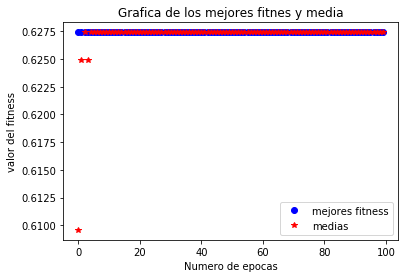

0.37258347978910367


In [12]:
from Datos import Datos
import EstrategiaParticionado
import ClasificadorGenetico
import numpy as np
import ClasificadorAG

data = 'ConjuntosDatos/wdbc-10.data'
dataset=Datos(data)
clasificador=ClasificadorGenetico.ClasificadorGenetico()
cla = ClasificadorAG.ClasificadorAG(100, 100)
a =cla.procesamiento(dataset, clasificador, True)
cla.imprimirGraficas()
print(a)

Hemos obtenido una media de error baja, lo cual es bueno y como se puede apreciar en la gráfica la media del fitness es muy bueno, empieza siendo muy malo y va mejorando, llega a un punto que converge y por muchas generaciones que haya no pasa de este punto. Esto podría haberse mejorado usando elitismo, también, cabe destacar que esta ejecución es un poco particular, a veces el fitnes mejora, empeora y vuelve a mejorar o realiza otro tipo de dibujos, aunque normalmente con tendencia alcista.
